## My Steps To Completing This Scripting Assignment

First I took Dr. Ramljak's solution in bash, and broke it apart in order to more easily understand what is happening.

The tr command is simply converting all uppercase letters in the input to lowercase letters.

In [ ]:
tr '[:upper:]' '[:lower:]'

The grep command searches through the input and collects all of the substrings that match the regular expression that is specified. In my case that is [[:lower:]']+. -o makes sure that the future commands that we run in this script only apply to the substrings, and -E makes sure that the specified regular expression is evaluated correctly.

I had to do some research on regular expressions in order to apply the correct one. "[:lower:]" looks for any lowercase letter and " ' " looks for the " ' " character. Putting those inside "[]" looks for a substring that is a single character long that matches any lowercase letter or a " ' ". Adding " + " to the end causes the command to look for all substrings of any length that have those characters.

In [ ]:
grep -oE "[[:lower:]']+"

The sort command sorts the input

In [ ]:
sort

The uniq command removes all the repeated substrings that were found. -c prefixes each substring with the amount of times that substring was found.

In [ ]:
uniq -c

The sort command sorts the input. -n sorts the input based off of numerical value (so in this case, the numbers that were prefixed by the uniq command). -r reversed the order so that the largest number appears first.

In [ ]:
sort -nr

Finally, the head command displays the number of specified lines of the input. -n allows the user to specify the number of lines to display.

In [ ]:
head -n

I took this information and ultimately came up with the following steps that I would need to apply in each language in order to complete the task:
    - convert the input to all lowercase
    - find all substrings that match the regular expression
    - count the number of times each substring was found
    - display the top ten words

## Python

I completed the python script first, since I understand Python the most. Here is my script:

In [1]:
#!/usr/bin/env python3

# this is needed in order to use regular expressions
import re

f = open("HuckFinn.txt", errors='ignore')

# read the file into memory.
# lines is now an array full of strings
# that are each line from HuckFinn.txt
lines = f.readlines()

# close the file since its contents are now in memory
f.close()

# this dictionary will have each word as a key, and
# the number of times that it appears as the value
data = {}

for line in lines:
    # convert the line to lowercase
    line = line.lower()
    
    # find all substrings that match the regular expression
    words = re.findall("[a-z']+", line)
    
    # this for loop will count the number of times each
    # substring has occured
    for word in words:
        if (word in data):
            data[word] += 1
        else:
            data[word] = 1
            
# sort the key, value pairs based on their values
top_ten = sorted(data, key=data.get, reverse=True)[:10]

# display the top ten
for key in top_ten:
    print("  ", data[key], key)

   6440 and
   5079 the
   3277 i
   3260 a
   3024 to
   2349 it
   2072 was
   1777 of
   1686 he
   1516 in


As you can see, I followed my steps of converting, finding all substrings, counting, and displaying. I decided to use hashmaps because accessing and updating them are fairly quick. The hardest challenge was figuring out how to order them, because hashmaps are unordered by default. Luckily most of the languages either had a built-in sorting function for hashmaps, or they had an easy solution.
Below you can find the rest of my scripts.

## Bash

In [ ]:
#!/usr/bin/env bash

(tr '[:upper:]' '[:lower:]' | grep -oE "[[:lower:]']+" | sort |
uniq -c | sort -nr | head -n 10) < HuckFinn.txt

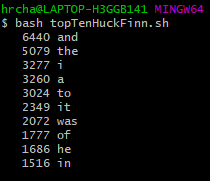

## JavaScript

In [ ]:
#!/usr/bin/env node

// used to read input files
var fs = require('fs');

fs.readFile('HuckFinn.txt', 'utf8', function(err, text) {
    // display error if one occured while trying to open the file
    if (err) {
        return console.log(err);
    }

    // this is the regular expression. the gi at the end makes
    // sure that all substrings that match this expression are
    // found, and it will not be case-sensitive.
    var re = /[a-z']+/gi;

    // find all substrings that match the regular expression
    var words = text.match(re);

    // this Map() object will hold key, value pairs where
    // the word will be the key and the number of times that
    // it appears will be the value
    var data = new Map();

    for (word of words) {
        // convert each word to lowercase
        word = word.toLowerCase();

        // update the number of times that it has occured so far
        if (data.has(word)) {
            data.set(word, data.get(word) + 1);
        } else {
            data.set(word, 1);
        }
    }

    // sort the Map() objects key, value pairs based on their values
    var topTen = new Map([...data.entries()].sort((a, b) => b[1] - a[1]));

    // display the top ten
    var keys = topTen.keys();
    for (var i = 0; i < 10; i++) {
        key = keys.next().value;
        console.log("  ", topTen.get(key), key);
    }
});

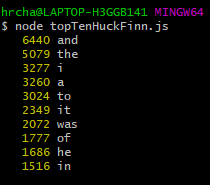

## Lua

In [ ]:
#!/usr/bin/env lua

-- this is a hashmap that will hold key, value pairs
-- where the word is the key and the number of times
-- that it appears is its value
local freq = {}

for line in io.lines('HuckFinn.txt') do
    -- convert each line of the text to lowercase
    local lowerline = string.lower(line)

    -- find all substrings that match the regular expression
    for word in string.gmatch(lowerline, "[%a']+") do
        -- update the number of times that the substring
        -- has appeared so far
        if not freq[word] then
            freq[word] = 1
        else
            freq[word] = freq[word] + 1
        end
    end
end

local array = {}

-- fill array with the key, value pairs. I.E. array[0] => 'and, 6440'
-- this is necessary so that we can sort them correctly
for word, count in pairs(freq) do
        table.insert(array, {word, count})
end

-- sort the key, value pairs based on their value
table.sort(array, function (a, b) return a[2] > b[2] end)

-- display the top ten
for i = 1, 10 do
        io.write(string.format('%7d %s\n', array[i][2] , array[i][1]))
end

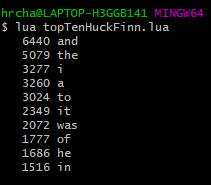

## Perl

In [ ]:
#!/usr/bin/env perl

# open the file
open($file, '<', 'HuckFinn.txt');

# read contents of file into memory
@whole_file = <$file>;

# close file since its contents is now in memory
close($file);

# this is a hashmap that will hold key, value pairs
# where the key is the word and the value is the
# number of times that it appears
%data = ();

foreach $line (@whole_file) {
    # convert each line to lowercase
    $line = lc $line;

    # find all substrings that match the regular expression
    foreach $word ($line =~ /[a-z']+/g) {
        # update the number of times that it has appeared so far
        if (exists($data{$word})) {
            $data{$word} = $data{$word} + 1;
        } else {
            $data{$word} = 1;
        }
    }
}

# sort the key, value pairs based on their values
@top_ten = (reverse sort {$data{$a} <=> $data{$b}} keys %data)[0..9];

# display the top ten
foreach $key (@top_ten) {
    print "   $data{$key} $key\n";
}

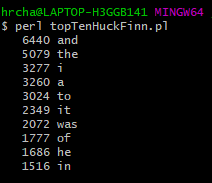

## Ruby

In [ ]:
#!/usr/bin/env ruby

# this is our regular expression
RE = /[[:alpha:]']+/

# open("HuckFinn.txt") => open the file
# read.downcase        => convert the contents to lowercase
# scan(RE)             => find all substrings that match the regular expression
# tally                => count how many times each substring appears
# max_by(10, &:last)   => only keep the top ten based on their tallies
count = open("HuckFinn.txt").read.downcase.scan(RE).tally.max_by(10, &:last)

# display the top ten
count.each{|ar| puts ("   " + ar[1].to_s + " " + ar[0].to_s)}

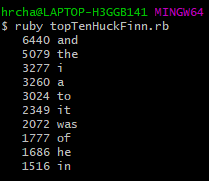